# Computer Vision - Trabajo  Práctico 2

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## 1.

In [299]:
def create_gauss_filter(h, w, ksize=1, sigma=5):

    # Armo un fondo negro con las dimensiones indicadas
    canvas = np.zeros((h, w))
    # Creo un kernel gaussiano 
    nucleo_g = cv.getGaussianKernel(ksize=ksize, sigma= sigma) * 255
    filtro_g_cuadrado = nucleo_g * nucleo_g.T

    
    centro=(int(canvas.shape[1]/2), int(canvas.shape[0]/2))
    centro_g = (int(filtro_g_cuadrado.shape[1]/2), int(filtro_g_cuadrado.shape[0]/2))

    # Calculo el offset de posiciones x e y entre el fondo y el kernel creado para luego centrarlo sobre el fondo
    dy = (centro[1] - centro_g[1])
    dx = (centro[0] - centro_g[0])

    filtro_g = canvas.copy()
    filtro_g[dy:dy + filtro_g_cuadrado.shape[0], dx:dx + filtro_g_cuadrado.shape[1]] = filtro_g_cuadrado

    # Calculo la FFT del filtro creado y la desplazo al origen
    shifted_filter_fft = np.fft.fftshift(np.fft.fft2(filtro_g)) 

    return filtro_g, 20*np.log(np.abs(shifted_filter_fft))

In [ ]:
# Cargo la imagen y creo un filtro gaussiano de sus mismas dimensiones
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
filtro, filtro_tf = create_gauss_filter(img.shape[0],img.shape[1], ksize=min(img.shape), sigma=45)
filtro2, filtro_tf2 = create_gauss_filter(img.shape[0],img.shape[1], ksize=20, sigma=3)
filtro3, filtro_tf3 = create_gauss_filter(img.shape[0],img.shape[1], ksize=100, sigma=15)
filtro4, filtro_tf4 = create_gauss_filter(img.shape[0],img.shape[1], ksize=100, sigma=25)
filtro5, filtro_tf5 = create_gauss_filter(img.shape[0],img.shape[1], ksize=250, sigma=35)

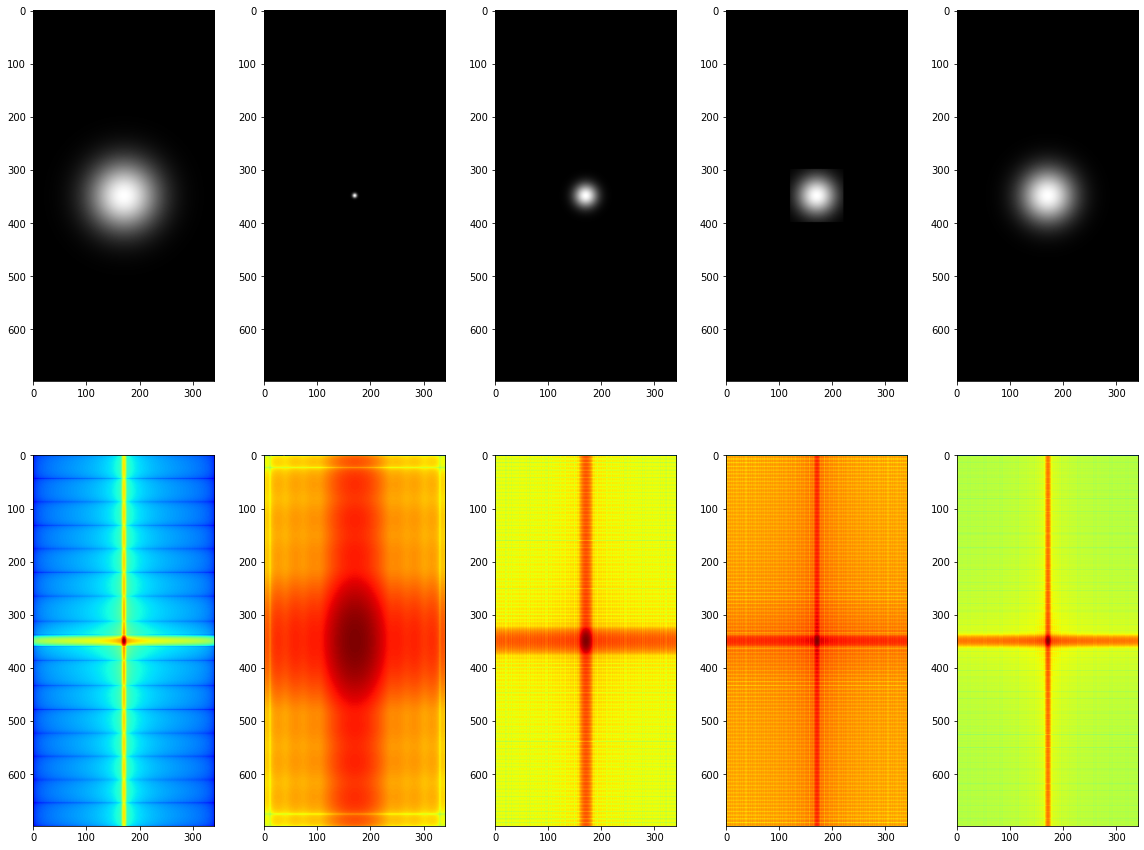

In [301]:
# Grafico los filtros creados y sus transformadas de Fourier

plt.figure(figsize=(20,15))
plt.subplot(2,5,1)
plt.imshow(filtro, cmap='gray')
plt.subplot(2,5,2)
plt.imshow(filtro2, cmap='gray')
plt.subplot(2,5,3)
plt.imshow(filtro3, cmap='gray')
plt.subplot(2,5,4)
plt.imshow(filtro4, cmap='gray')
plt.subplot(2,5,5)
plt.imshow(filtro5, cmap='gray')

plt.subplot(2,5,6)
plt.imshow(filtro_tf, cmap='jet')
plt.subplot(2,5,7)
plt.imshow(filtro_tf2, cmap='jet')
plt.subplot(2,5,8)
plt.imshow(filtro_tf3, cmap='jet')
plt.subplot(2,5,9)
plt.imshow(filtro_tf4, cmap='jet')
plt.subplot(2,5,10)
plt.imshow(filtro_tf5, cmap='jet')

In [302]:
# Calculo la fft de la imagen a procesar
shifted_fft = np.fft.fftshift(np.fft.fft2(img))

# Aplico cada uno de los filtros y hallo la antitransformada
f_ishift = np.fft.ifftshift(shifted_fft * filtro)
img_filtrada1 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro2)
img_filtrada2 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro3)
img_filtrada3 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro4)
img_filtrada4 = np.real(np.fft.ifft2(f_ishift))
f_ishift = np.fft.ifftshift(shifted_fft * filtro5)
img_filtrada5 = np.real(np.fft.ifft2(f_ishift))

Text(0.5, 1.0, 'Desenfoque gausiano 5')

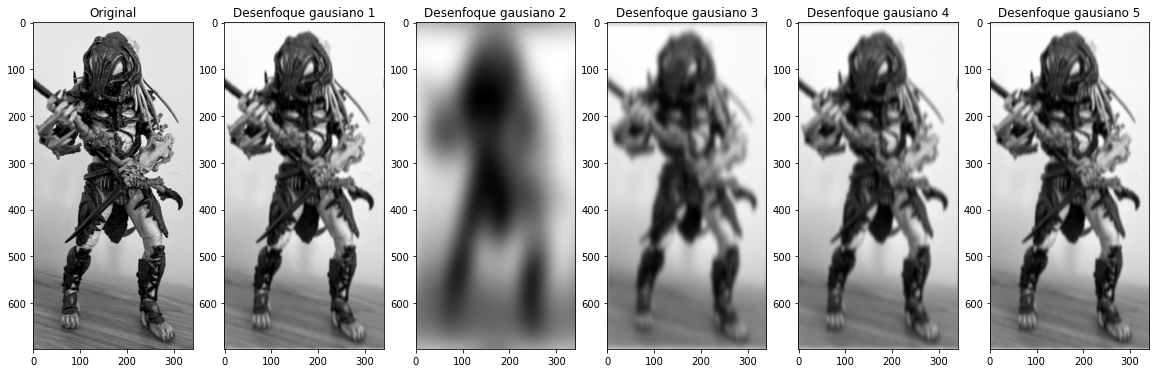

In [303]:
plt.figure(figsize=(20, 15))
plt.subplot(1,6,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,6,2)
plt.imshow(img_filtrada1, cmap='gray')
plt.title('Desenfoque gausiano 1')

plt.subplot(1,6,3)
plt.imshow(img_filtrada2, cmap='gray')
plt.title('Desenfoque gausiano 2')

plt.subplot(1,6,4)
plt.imshow(img_filtrada3, cmap='gray')
plt.title('Desenfoque gausiano 3')

plt.subplot(1,6,5)
plt.imshow(img_filtrada4, cmap='gray')
plt.title('Desenfoque gausiano 4')

plt.subplot(1,6,6)
plt.imshow(img_filtrada5, cmap='gray')
plt.title('Desenfoque gausiano 5')

## 2.

In [304]:
def get_ImageQualityMeasureFM(img: np.ndarray, threshold= 1000):
    f = np.fft.fft2(img)
    fc = np.fft.fftshift(f)
    af = np.abs(fc)
    m = af.max()
    th = af[af>=m/threshold].shape[0]
    imageQualityMeasureFM = th/(img.shape[0]*img.shape[1])
    return imageQualityMeasureFM

Aplico filtros gaussianos por convolución y por dominio espectral a la misma imagen

In [305]:
# Filtrado por convolución espacial
img_filtrada_esp = cv.GaussianBlur(img, ksize=(15, 15), sigmaX=5)
# Filtrado por convolución espectral
img_filtrada_frec = np.real(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(img)) * create_gauss_filter(img.shape[0],img.shape[1], ksize=15, sigma=5)[0])))

Text(0.5, 1.0, 'Filtrado Espectral')

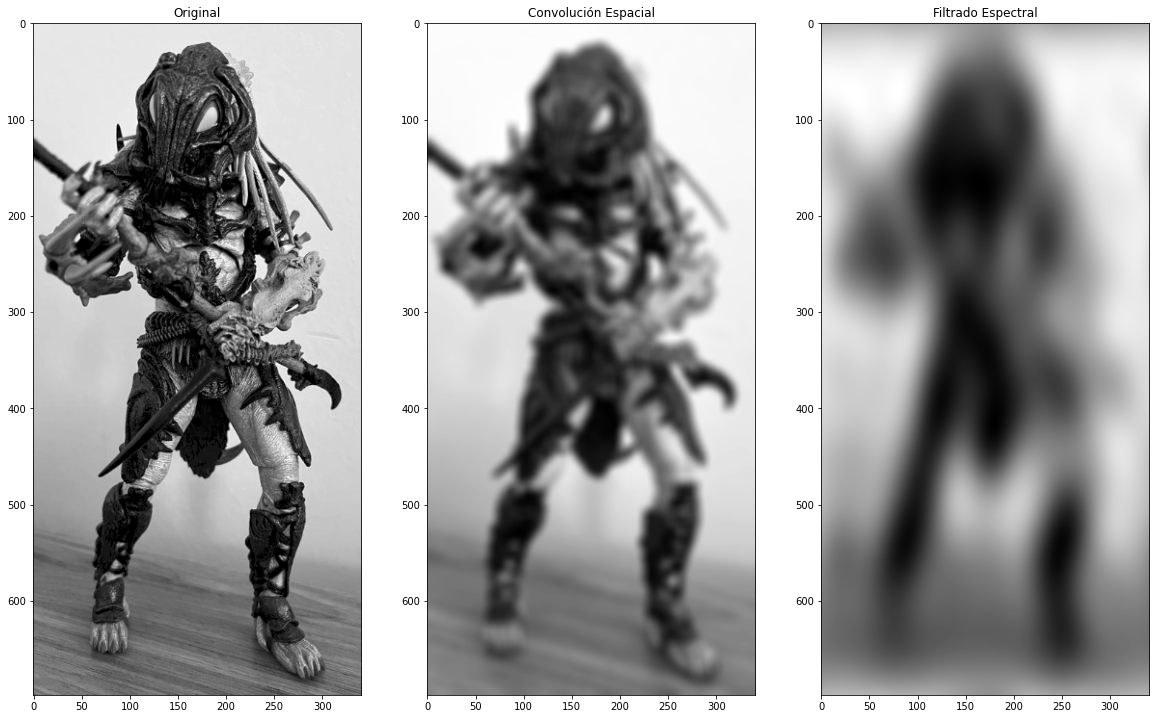

In [306]:
plt.figure(figsize=(20, 15))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_filtrada_esp, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,3,3)
plt.imshow(img_filtrada_frec, cmap='gray')
plt.title('Filtrado Espectral')

Por qué? 
Grafico ambos kernels

Text(0.5, 1.0, 'Filtrado Espectral')

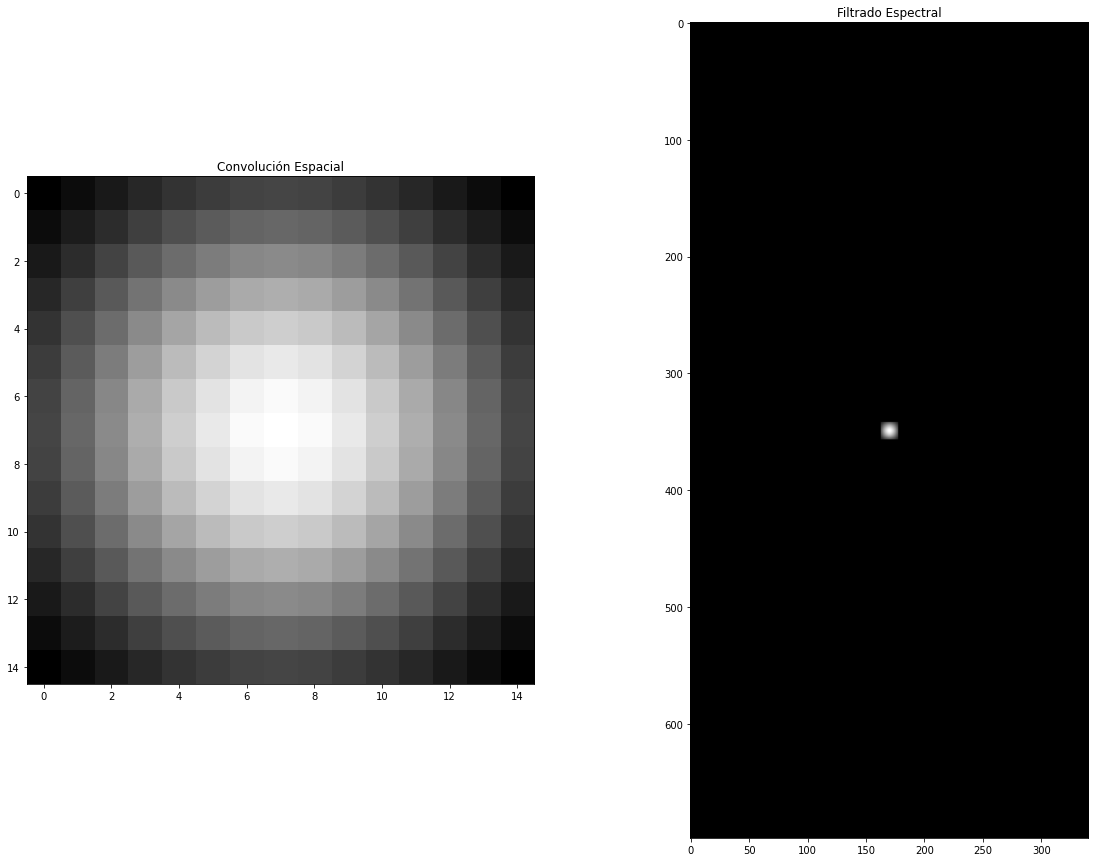

In [307]:
k = cv.getGaussianKernel(ksize=15, sigma=5)
kernel = k*k.T

plt.figure(figsize=(20, 15))

plt.subplot(1,2,1)
plt.imshow(kernel, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,2,2)
plt.imshow(create_gauss_filter(img.shape[0],img.shape[1], ksize=15, sigma=5)[0], cmap='gray')
plt.title('Filtrado Espectral')


El primer filtro deja pasar mucha más intensidad al ir recorriendo la imagen, mientras que el segundo aplica un desenfoque mucho más marcado

In [308]:
calidad_original = get_ImageQualityMeasureFM(img)
calidad_conv = get_ImageQualityMeasureFM(img_filtrada_esp)
calidad_dom_esp = get_ImageQualityMeasureFM(img_filtrada_frec)

print(calidad_original, calidad_conv, calidad_dom_esp)

0.0364888369787159 0.009448865211874732 0.0008864875765698392


Según el algoritmo del paper, imagen filtrada espectralmente es de peor calidad que la filtrada por convolución, aunque no es una comparación muy justa debido a lo mencionado anteriormente.

Intento una comparación más justa cambiando los parámetros de los filtros:

In [309]:
# Filtrado por convolución espacial
img_filtrada_esp = cv.GaussianBlur(img, ksize=(11,11), sigmaX=1.5)
# Filtrado por convolución espectral
img_filtrada_frec = np.real(np.fft.ifft2(np.fft.ifftshift(np.fft.fftshift(np.fft.fft2(img)) * create_gauss_filter(img.shape[0],img.shape[1], ksize=min(img.shape), sigma=45)[0])))

Text(0.5, 1.0, 'Filtrado Espectral')

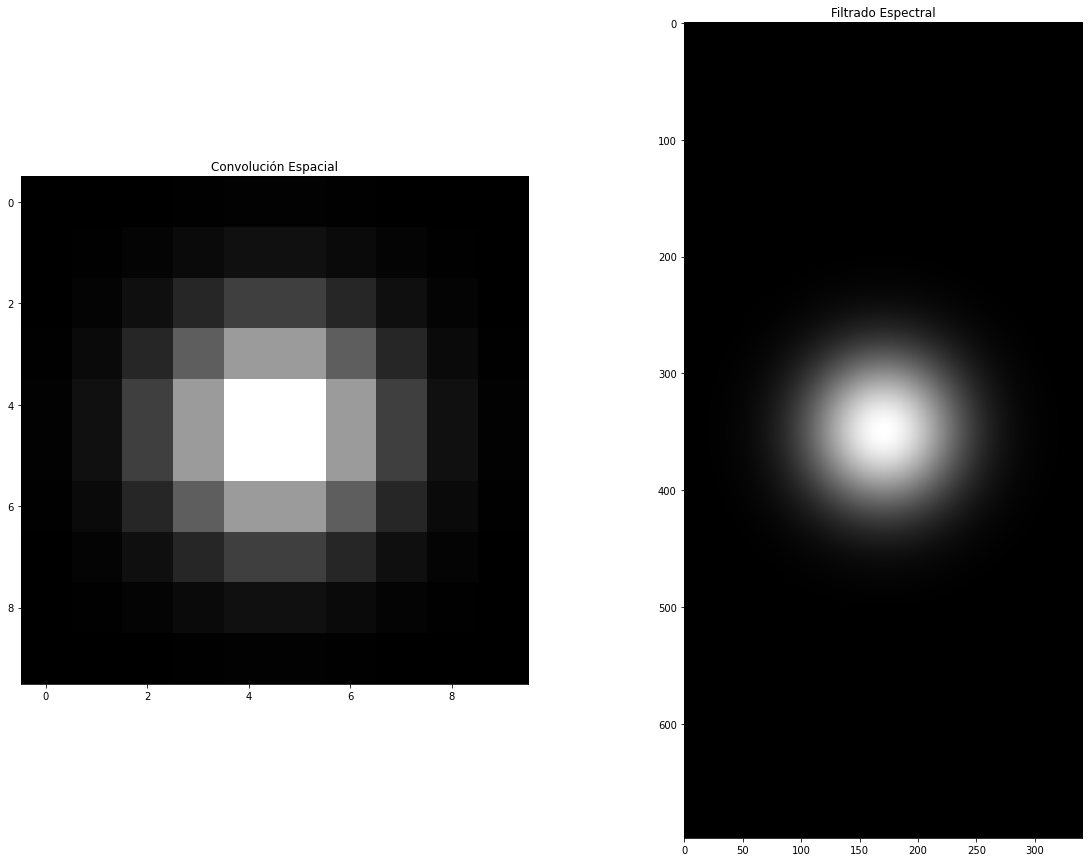

In [310]:
k = cv.getGaussianKernel(ksize=10, sigma=1.5)
kernel = k*k.T

plt.figure(figsize=(20, 15))

plt.subplot(1,2,1)
plt.imshow(kernel, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,2,2)
plt.imshow(create_gauss_filter(img.shape[0],img.shape[1], ksize=min(img.shape), sigma=45)[0], cmap='gray')
plt.title('Filtrado Espectral')


Text(0.5, 1.0, 'Filtrado Espectral')

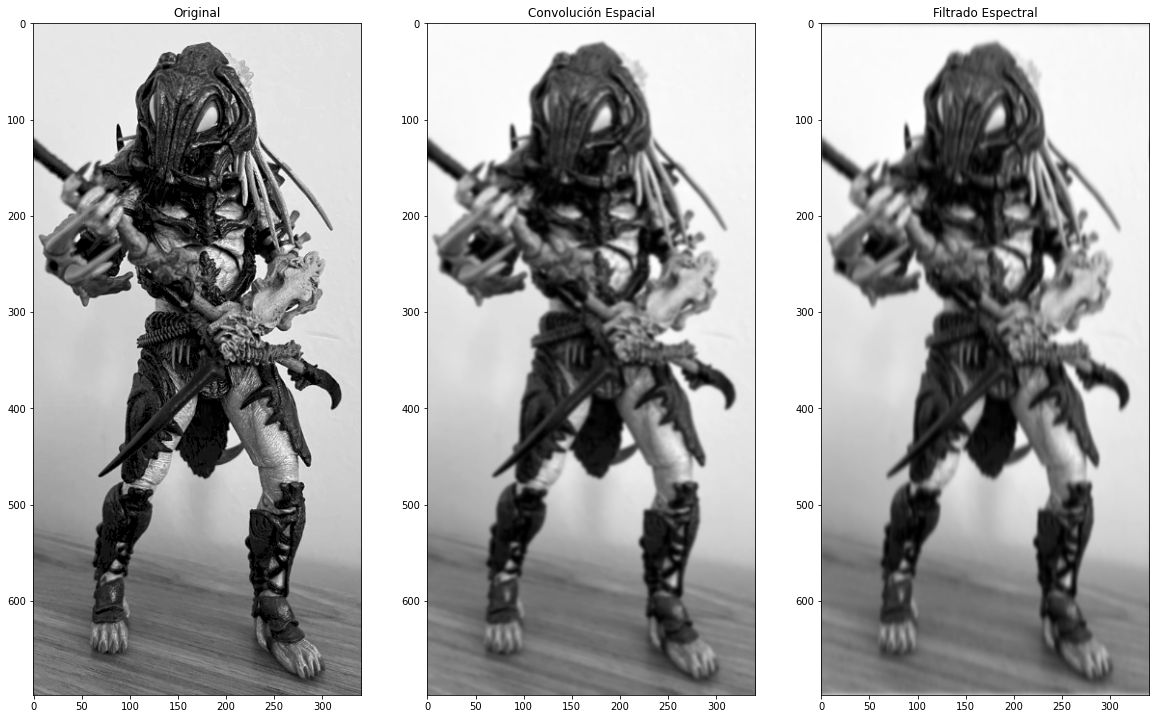

In [311]:
plt.figure(figsize=(20, 15))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_filtrada_esp, cmap='gray')
plt.title('Convolución Espacial')

plt.subplot(1,3,3)
plt.imshow(img_filtrada_frec, cmap='gray')
plt.title('Filtrado Espectral')

In [312]:
calidad_original = get_ImageQualityMeasureFM(img)
calidad_conv = get_ImageQualityMeasureFM(img_filtrada_esp)
calidad_dom_esp = get_ImageQualityMeasureFM(img_filtrada_frec)

print(calidad_original, calidad_conv, calidad_dom_esp)

0.0364888369787159 0.021884899461385273 0.01882630725407322


## 3. Histogram entropy as a focus measure operator

Since a focused image is expected to have a higher information content, the entropy and range of the image histogram can be used to compute the focus measure. The histogram entropy operator is defined as:

![alt text](histogramentropy.png)


where Pk is the relative frequency of the k-th gray-level.





In [313]:
hist1,bins1 = np.histogram(img,256,[0,256])
hist2,bins2 = np.histogram(img_filtrada_esp,256,[0,256])
hist3,bins3 = np.histogram(img_filtrada_frec,256,[0,256])

Text(0.5, 1.0, 'Filtrado Espectral')

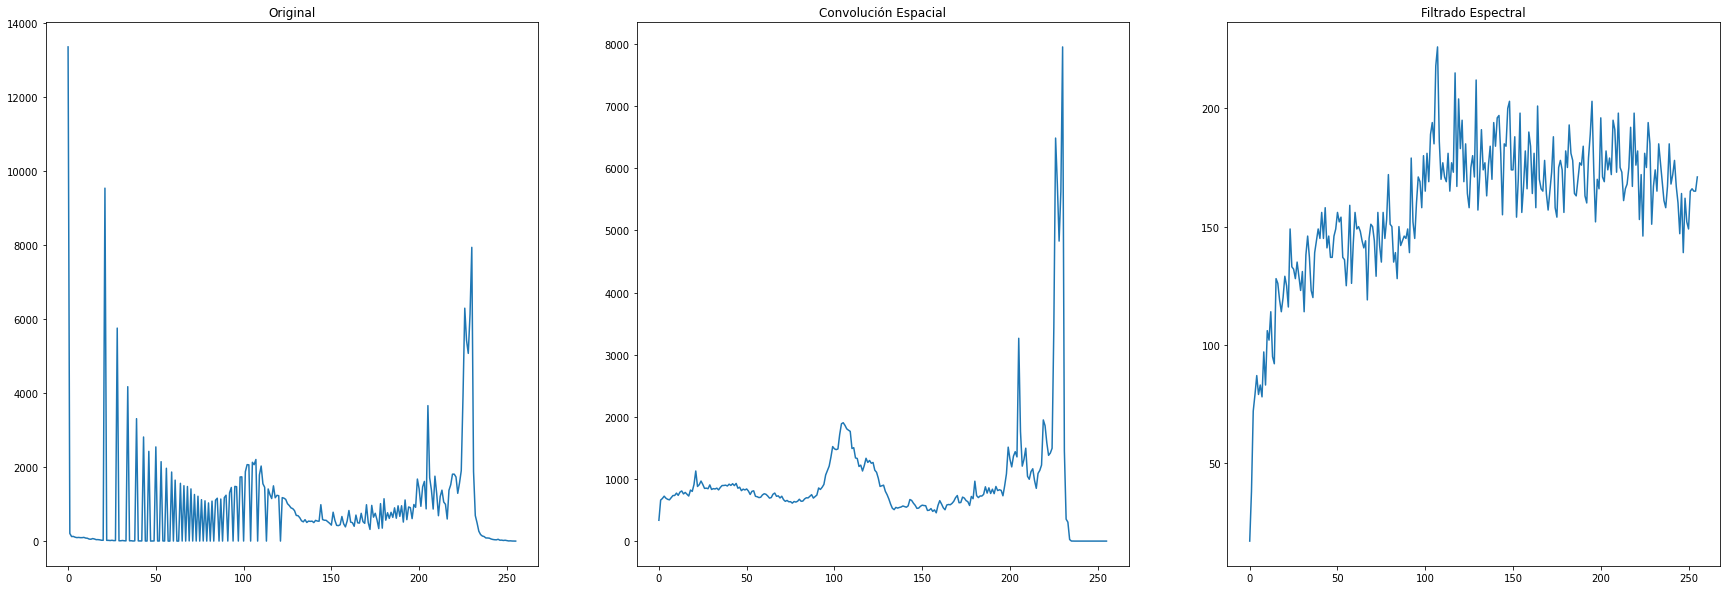

In [314]:
plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.plot(hist1)
plt.title('Original')

plt.subplot(1,3,2)
plt.plot(hist2)
plt.title('Convolución Espacial')

plt.subplot(1,3,3)
plt.plot(hist3)
plt.title('Filtrado Espectral')

Se ve que aunque ambas imágenes filtradas compartían una calidad similar según el algoritmo de ImageQualityMeasureFM, sus histogramas son muy diferentes

In [315]:
def get_HistogramEntropyFM(img):
    hist = np.histogram(img,256,[0,256])[0]
    fi_list = [hist*np.log(hist)]
    return np.nan_to_num(np.array(fi_list)).sum()

In [316]:
img_hefm = get_HistogramEntropyFM(img)
img_hefm_conv = get_HistogramEntropyFM(img_filtrada_esp)
img_hefm_frec = get_HistogramEntropyFM(img_filtrada_frec)

print(img_hefm, img_hefm_conv, img_hefm_frec)

1809168.2837520302 1696434.9273120125 206746.8012716512


C:\Users\leand\AppData\Local\Temp\ipykernel_1720\3088120263.py:3: RuntimeWarning: divide by zero encountered in log
  fi_list = [hist*np.log(hist)]
C:\Users\leand\AppData\Local\Temp\ipykernel_1720\3088120263.py:3: RuntimeWarning: invalid value encountered in multiply
  fi_list = [hist*np.log(hist)]


#### Conclusión

Obtenemos diferentes puntajes de las imágenes filtradas, siendo el de la imagen filtrada espectralmente menor al de la filtrada por convolución espacial, siendo esto coherente con los scores que habíamos obtenido por el método anterior.